this file is for Unet only


In [1]:
#!pip uninstall numpy
!pip install numpy

#!pip install numpy==1.21.6

In [2]:
import tensorflow as tf
from tensorflow import keras

C:\Users\liang\anaconda3\envs\tensorflow_gpu_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\liang\anaconda3\envs\tensorflow_gpu_env\lib\site-packages\numpy\.libs\libopenblas.xwydx2ikjw2nmtwsfyngfuwkqu3lytcz.gfortran-win_amd64.dll
C:\Users\liang\anaconda3\envs\tensorflow_gpu_env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
import tensorflow as tf
from tensorflow.python.framework import config as tf_config

print("TensorFlow Version:", tf.__version__)

print("Built with CUDA:", tf.test.is_built_with_cuda())

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))



TensorFlow Version: 2.6.0
Built with CUDA: True
Num GPUs Available: 1


In [5]:
!pip install tqdm

In [6]:
!pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ----------------------------- ---------- 6.8/9.3 MB 34.9 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 36.0 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn.functional import relu
from torch.utils.data import Dataset
from PIL import Image
from tqdm import tqdm
import ast
import random

Total images found: 30083
Sample images: ['1.2.826.0.1.3680043.8.498.67934436920603392886633238349053896935.jpg', '1.2.826.0.1.3680043.8.498.11899446790381928393084765318939185474.jpg', '1.2.826.0.1.3680043.8.498.67730421668745840371057964430028705366.jpg', '1.2.826.0.1.3680043.8.498.75239134920282764729378840757814218954.jpg', '1.2.826.0.1.3680043.8.498.84472839875948876829268566623518529475.jpg']


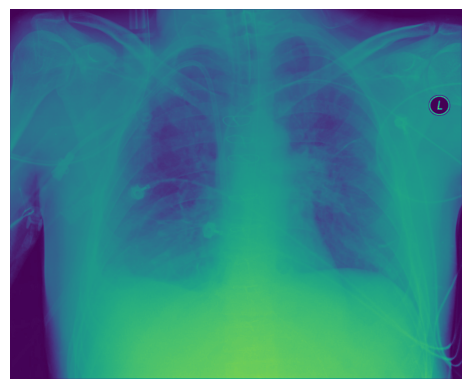

In [2]:
# Define the directory path containing the images
image_dir = '/projects/sc73/ranzcr-clip-catheter-line-classification/train'

# List all files in the directory (you can filter only image files if needed)
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]

# Display the first few image file names
print(f"Total images found: {len(image_files)}")
print("Sample images:", image_files[:5])

# Example: Load and display the first image using PIL
first_image_path = os.path.join(image_dir, image_files[0])

# Load the image using PIL
image = Image.open(first_image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

In [4]:
def check_image_properties(image_dir, sample_size=5):
    # List all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
    
    # Check properties of a few sample images
    for i in range(min(sample_size, len(image_files))):
        image_path = os.path.join(image_dir, image_files[i])
        image = Image.open(image_path)
        print(f"Image: {image_files[i]}")
        print(f"Size (Width x Height): {image.size}")
        print(f"Mode (Number of Channels): {image.mode}")  # 'L' means grayscale
        
        # Convert the image to a NumPy array to inspect grayscale values
        image_array = np.array(image)
        print("Grayscale pixel values (sample):")
        print(image_array)  # Displays the pixel values of the grayscale image
        print(f"Min value: {image_array.min()}, Max value: {image_array.max()}")
        print("-" * 40)


In [5]:
check_image_properties(image_dir, sample_size=20) #randomly pick 20 images and check their inform

Image: 1.2.826.0.1.3680043.8.498.67934436920603392886633238349053896935.jpg
Size (Width x Height): (2500, 2048)
Mode (Number of Channels): L
Grayscale pixel values (sample):
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 6 6 5]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 3 2 2]]
Min value: 0, Max value: 255
----------------------------------------
Image: 1.2.826.0.1.3680043.8.498.11899446790381928393084765318939185474.jpg
Size (Width x Height): (3056, 2544)
Mode (Number of Channels): L
Grayscale pixel values (sample):
[[ 0  0  0 ...  3  3  3]
 [ 0  0  0 ...  3  3  3]
 [ 0  0  0 ...  3  3  3]
 ...
 [ 1  1  1 ... 46 47 47]
 [ 1  1  1 ...  9 10 11]
 [ 0  0  0 ...  0  1  1]]
Min value: 0, Max value: 255
----------------------------------------
Image: 1.2.826.0.1.3680043.8.498.67730421668745840371057964430028705366.jpg
Size (Width x Height): (3056, 2544)
Mode (Number of Channels): L
Grayscale pixel values (sample):
[[ 2  3  5 ...  9  9  9]
 [ 2  2  5 ...  9  9  9]
 [ 0  1  3 .

In [ ]:
#note: 

In the context of the Python Imaging Library (PIL), mode='L' means that the image is in grayscale mode. Specifically:


mode='L': This mode indicates that the image is in grayscale, with each pixel represented by a single value between 0 and 255. The 'L' stands for "luminance" and represents the brightness of the pixel.mode='L' ：

mode='L' ：此模式表示图像为灰度图像，每个像素由 0 到 255 之间的单个值表示。 'L'代表“亮度”，表示像素的亮度。

Grayscale Images: These are images that do not contain color information (i.e., no Red, Green, Blue channels) but only intensity or brightness information. Grayscale images are often used in medical imaging, including X-rays, because they effectively represent the necessary details without the complexities of color data.

灰度图像：这些图像不包含颜色信息（即没有红色、绿色、蓝色通道），而仅包含强度或亮度信息。灰度图像通常用于医学成像（包括 X 射线），因为它们可以有效地表示必要的细节，而无需复杂的彩色数据。

In [ ]:
# 512*512 is too small to capture important infom, 1536*1536 is too big which will take too much time and GPUs, so we choose 1024*1024 

In [ ]:
# let's do 512*512 firstly

Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.59776175629368872872424615968611659657.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.60523095345791736596112904992544934300.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.60946752499839299438889356567020750521.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.62381415306137582055307004397320751329.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.63623085707766899459778592511242052330.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.64611643003857539966241349521939595541.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.65373600194741655354803266082868802293.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.65744560518076297687954273751959969284.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.66351209110039920496177079362546944

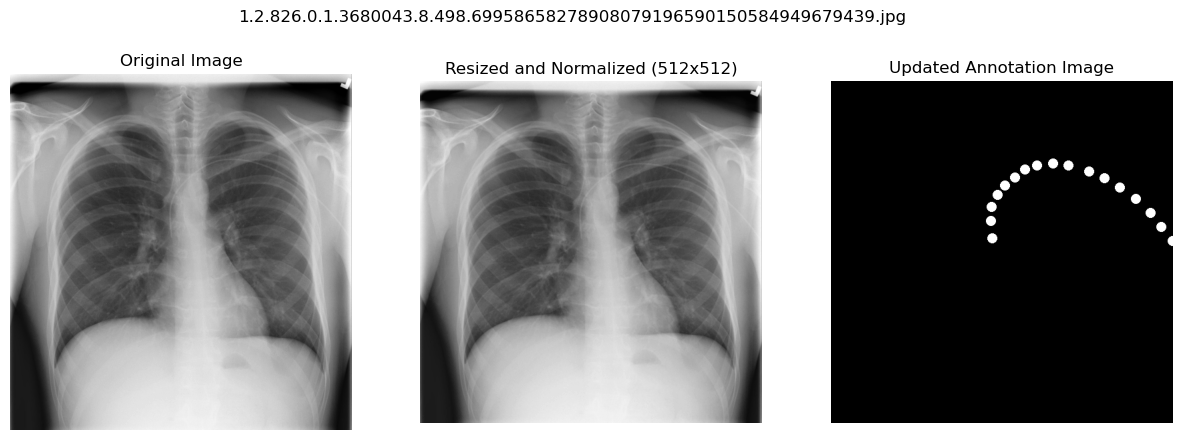

Updated coordinates for 1.2.826.0.1.3680043.8.498.69958658278908079196590150584949679439.jpg: [(241, 235), (239, 209), (240, 188), (249, 170), (260, 156), (275, 144), (290, 132), (308, 126), (332, 123), (355, 126), (386, 135), (409, 145), (432, 159), (456, 176), (478, 197), (494, 218), (511, 239)]
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.72523719976447481863883872049422943809.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.74367963992329101150231641138567601332.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.77544635910696881840975609960367479722.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.79877223599278501218844780857916194748.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.80661818192340455502644880260258106706.npy


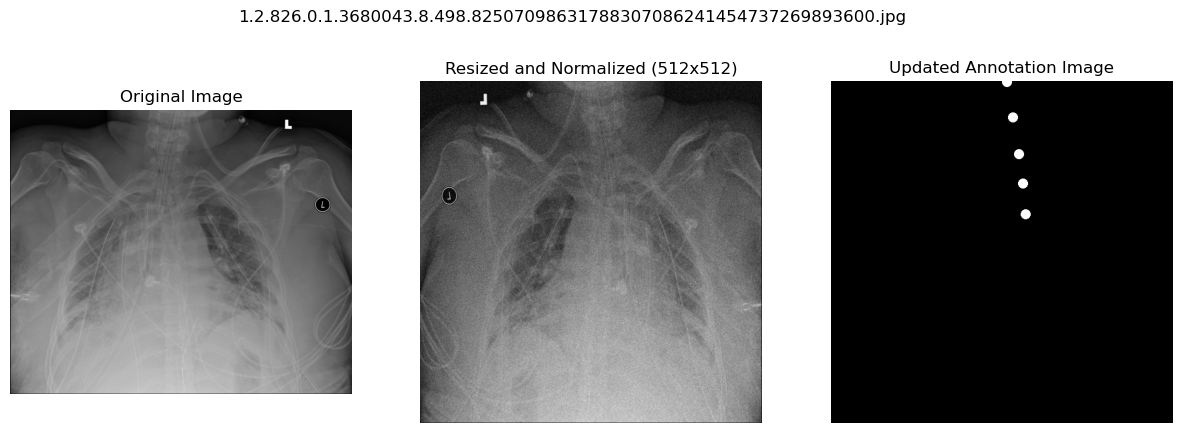

Updated coordinates for 1.2.826.0.1.3680043.8.498.82507098631788307086241454737269893600.jpg: [(263, 1), (272, 54), (281, 109), (287, 153), (291, 199)]
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.83888601345880531775335423861069912376.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.84767774202617600469190871723066435017.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.86729912829865132536981412592332039688.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.87138338680714530784084209332966250057.npy


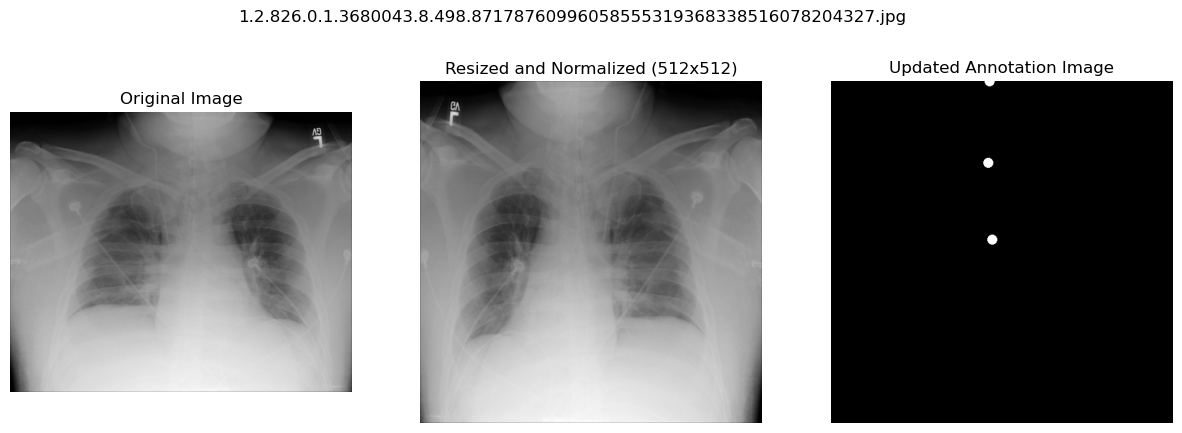

Updated coordinates for 1.2.826.0.1.3680043.8.498.87178760996058555319368338516078204327.jpg: [(241, 237), (235, 122), (237, 0)]
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.87564478156169448373324683255687687232.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.88444935525575933803230832356438963094.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.89274214258755297232890081414656377132.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.90528115449021052171072476553143952303.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.90959448302070270145645870091169552207.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.91601712585344677596321566277049929271.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.93694808327049802582748251337802265986.npy
Processed and saved: E:/512preprocessed_v1\1.2.826.0.1.3680043.8.498.974448071676328282

In [12]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance, ImageFile, ImageDraw
import matplotlib.pyplot as plt
from PIL import ImageOps

ImageFile.LOAD_TRUNCATED_IMAGES = True  # Allow loading of truncated images

output_dir = r"E:/512preprocessed_v1"  # Define where to save preprocessed images with limited output

# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Load the real mask annotations
annotation_path = r"C:/Users/liang/OneDrive/Desktop/S4/ADS2002/group/Simon/ranzcr_catheter_classification/train_annotations.csv"
annotations_df = pd.read_csv(annotation_path)

# Function to preprocess images: resize to 512x512, normalize, and save
def preprocess_and_save_images(image_dir, output_dir, annotations_df, target_size=(512, 512), display_sample=False):
    # List all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
    
    # Limit the processing to the first 2500 images
    #image_files = image_files[:200]

    # Randomly select a few images to display
    sample_images = random.sample(image_files, min(5, len(image_files))) if display_sample else []
    
    updated_annotations_df = annotations_df.copy()
    
    for idx, image_name in enumerate(image_files):
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)
        original_image = image.copy()  # Keep the original image before augmentations

        # Update corresponding mask annotations
        study_uid = os.path.splitext(image_name)[0]
        if study_uid in annotations_df['StudyInstanceUID'].values:
            mask_coords = annotations_df[annotations_df['StudyInstanceUID'] == study_uid]['data'].values[0]
            # Assuming mask_coords is a list of coordinate pairs in string format
            mask_coords = eval(mask_coords)  # Convert string representation to list
        else:
            mask_coords = []

        # Random augmentations (no rotation)
        augmentations = [
            lambda img, coords: (img.transpose(Image.FLIP_LEFT_RIGHT), flip_coordinates(coords, img.size)),
            lambda img, coords: (ImageEnhance.Brightness(img).enhance(random.uniform(0.85, 1.15)), coords),
            lambda img, coords: (ImageEnhance.Contrast(img).enhance(random.uniform(0.85, 1.15)), coords),
            lambda img, coords: (add_noise(img), coords)  # Add noise using a separate function
        ]
        
        for aug in augmentations:
            if random.random() > 0.5:
                image, mask_coords = aug(image, mask_coords)

        # Resize the image to the target size
        width_ratio = target_size[0] / image.width
        height_ratio = target_size[1] / image.height
        resized_image = image.resize(target_size)

        # Update mask coordinates based on resize
        updated_coords = update_coordinates(mask_coords, width_ratio, height_ratio)
        
        # Only keep rows with at least one coordinate
        if updated_coords:
            updated_annotations_df.loc[updated_annotations_df['StudyInstanceUID'] == study_uid, 'data'] = str(updated_coords)

            # Convert the resized image to a NumPy array and normalize pixel values to [0, 1]
            image_array = np.array(resized_image) / 255.0

            # Expand dimensions if grayscale to match the expected U-Net input shape (H, W, 1)
            if image_array.ndim == 2:  # If the image is grayscale
                image_array = np.expand_dims(image_array, axis=-1)

            # Save the preprocessed image as a .npy file (NumPy format) to avoid repeated processing
            output_path = os.path.join(output_dir, f"{os.path.splitext(image_name)[0]}.npy")
            np.save(output_path, image_array)

            # Display random samples for visual inspection
            if image_name in sample_images:
                # Generate an updated annotation image for visualization
                updated_annotation_image = Image.fromarray(np.zeros(target_size, dtype=np.uint8))
                draw = ImageDraw.Draw(updated_annotation_image)
                if updated_coords:  # Only draw if coordinates are not empty
                    for x, y in updated_coords:
                        if 0 <= x < target_size[0] and 0 <= y < target_size[1]:
                            draw.ellipse((x - 7, y - 7, x + 7, y + 7), fill=255)  # Draw a white circle with radius 7
                
                display_image_comparison(original_image, resized_image, updated_annotation_image, image_name)
                print(f"Updated coordinates for {image_name}: {updated_coords}")

            # Limit the output messages to every 100 images processed
            if idx % 100 == 0:
                print(f"Processed and saved: {output_path}")
    
    # Save the updated annotations to a new file
    updated_annotation_path = annotation_path.replace('.csv', '_updated.csv')
    updated_annotations_df.to_csv(updated_annotation_path, index=False)
    print("All images have been processed and saved successfully.")

# Function to add noise to an image
def add_noise(image):
    image_array = np.array(image) / 255.0
    if image_array.ndim == 2:  # If the image is grayscale
        noise = np.random.normal(0, 0.2, image_array.shape)
    else:  # If the image is color
        noise = np.random.normal(0, 0.2, (image_array.shape[0], image_array.shape[1], image_array.shape[2]))
    noisy_image = np.clip(image_array + noise, 0, 1) * 255.0
    return Image.fromarray(noisy_image.astype('uint8'))

# Function to update coordinates according to image transformations
def update_coordinates(coords, width_ratio, height_ratio):
    updated_coords = [(int(x * width_ratio), int(y * height_ratio)) for x, y in coords]
    # 确保坐标在有效范围内
    updated_coords = [(max(0, min(511, x)), max(0, min(511, y))) for x, y in updated_coords]
    return updated_coords

# Function to flip coordinates horizontally
def flip_coordinates(coords, image_size):
    width, _ = image_size
    updated_coords = [(width - x, y) for x, y in coords]
    # 确保坐标在有效范围内
    updated_coords = [(max(0, min(width - 1, x)), y) for x, y in updated_coords]
    return updated_coords

# Function to display the original and preprocessed images side by side
def display_image_comparison(original_image, resized_image, updated_annotation_image, title):
    plt.figure(figsize=(15, 5))
    
    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray' if original_image.mode == 'L' else None)
    plt.title('Original Image')
    plt.axis('off')

    # Display resized image
    plt.subplot(1, 3, 2)
    plt.imshow(np.array(resized_image), cmap='gray')
    plt.title('Resized and Normalized (512x512)')
    plt.axis('off')

    # Display updated annotation image
    plt.subplot(1, 3, 3)
    plt.imshow(updated_annotation_image, cmap='gray')
    plt.title('Updated Annotation Image')
    plt.axis('off')
    
    plt.suptitle(title)
    plt.show()

image_dir = "C:/Users/liang/OneDrive/Desktop/S4/ADS2002/group/Simon/ranzcr_catheter_classification/train"
preprocess_and_save_images(image_dir, output_dir, annotations_df, target_size=(512, 512), display_sample=True)



each images will have only one processed new image, and the augmentation is randomly conducting (50% it will be aug and loop 5 ways to ang)

具体来说：
augmentations 列表包含了 4种不同的增强方式（旋转、水平翻转、亮度调整、对比度调整和添加噪声）。

4 ways augmentation:Apply random augmentations such as flipping, brightness, contrast adjustment, and adding noise

it means each time operate images, one of the aug ways may be conducted or not (50% likelihood). but one image just have one resized and normalized image


对每张图像，程序会依次遍历每个增强操作，并通过随机数决定是否应用该操作。因此，每张图像可能会应用部分增强、全部增强、或没有增强，这取决于每次的随机结果

Specifically:

For each image, the program will traverse each enhancement operation in turn and use a random number to decide whether to apply the operation. Therefore, each image may be partially enhanced, fully enhanced, or not enhanced, depending on the random result each time.

In [14]:
import pandas as pd

# 加载标注信息的 CSV 文件
annotation_file = r"C:/Users/liang/OneDrive/Desktop/S4/ADS2002/group/Simon/ranzcr_catheter_classification/train_annotations_updated.csv"
annotations = pd.read_csv(annotation_file)

# 检查是否有 NaN 值
print(annotations.isna().sum())

annotations

StudyInstanceUID    0
label               0
data                0
dtype: int64


StudyInstanceUID             label  \
0      1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
1      1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
2      1.2.826.0.1.3680043.8.498.72921907356394389969...  CVC - Borderline   
3      1.2.826.0.1.3680043.8.498.11697104485452001927...      CVC - Normal   
4      1.2.826.0.1.3680043.8.498.87704688663091069148...      NGT - Normal   
...                                                  ...               ...   
17994  1.2.826.0.1.3680043.8.498.18590666552942008211...      ETT - Normal   
17995  1.2.826.0.1.3680043.8.498.18590666552942008211...      CVC - Normal   
17996  1.2.826.0.1.3680043.8.498.66774579023475418162...      CVC - Normal   
17997  1.2.826.0.1.3680043.8.498.18560506324214035535...      CVC - Normal   
17998  1.2.826.0.1.3680043.8.498.98119637144473510638...    CVC - Abnormal   

                                                    data  
0      [[1487, 1279], [1477, 1168], [1472, 1052], [14...  
1      [[1328, 7], [1347, 101], [1383, 193], [1400, 2...  
2      [(309, 305), (306, 281), (303, 259), (298, 232...  
3      [[1366, 961], [1411, 861], [1453, 751], [1508,...  
4      [(200, 2), (202, 58), (210, 174), (224, 279), ...  
...                                                  ...  
17994  [[1489, 631], [1515, 571], [1563, 535], [1596,...  
17995  [[1250, 1105], [1247, 1031], [1248, 970], [126...  
17996  [(235, 239), (237, 211), (237, 194), (232, 180...  
17997  [[1302, 1543], [1308, 1488], [1317, 1355], [13...  
17998  [(234, 255), (237, 233), (241, 195), (243, 161...  

[17999 rows x 3 columns]

In [16]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

'''
这里的aug images 和上面的resized images是同样内容但是不同格式和用法的2类东西：
resized_image 仍然是一个 PIL 图像对象，可以直接用 plt.imshow() 来显示。
aug images是增强后的图像（保存为 .npy）是一个 NumPy 数组，并且进行了归一化，适合用作深度学习模型的输入数据格式，是用于 训练深度学习模型的数据
'''
# Function to randomly select and compare original and augmented images
def compare_original_and_augmented(original_dir, augmented_dir, num_samples=5):
    # List all original and augmented image files
    original_files = [f for f in os.listdir(original_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
    augmented_files = [f for f in os.listdir(augmented_dir) if f.lower().endswith('.npy')]

    # Randomly select a few original images
    selected_files = random.sample(original_files, min(num_samples, len(original_files)))

    for original_name in selected_files:
        # Load the original image
        original_path = os.path.join(original_dir, original_name)
        original_image = Image.open(original_path)

        # Find corresponding augmented images
        base_name = os.path.splitext(original_name)[0]
        corresponding_augmented = [f for f in augmented_files if f.startswith(base_name)]

        # Randomly select one of the augmented images for comparison
        if corresponding_augmented:
            augmented_name = random.choice(corresponding_augmented)
            augmented_path = os.path.join(augmented_dir, augmented_name)

            # Load the augmented image
            augmented_image_array = np.load(augmented_path)
            augmented_image = Image.fromarray((augmented_image_array * 255).astype('uint8').squeeze())
            '''
            代码中的 (augmented_image_array * 255) 部分将归一化到 [0, 1] 的像素值重新放大到 [0, 255] 范围。
            这是因为在处理图像的过程中，之前对图像进行了归一化，将像素值从 [0, 255] 缩放到 [0, 1]，以便于深度学习模型训练。
            然而，在使用 Image.fromarray() 将 NumPy 数组转换为 PIL 图像对象时，像素值必须在 [0, 255] 范围内才能正确显示。
            如果不乘以 255，则 NumPy 数组中的像素值在 [0, 1] 之间，这样转换的图像会显得非常暗，甚至完全是黑色，因为 PIL 将这些小数值解释为非常低的像素强度。
            '''

            # Display the original and augmented images side by side
            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)
            plt.imshow(original_image, cmap='gray' if original_image.mode == 'L' else None)
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(augmented_image, cmap='gray' if original_image.mode == 'L' else None)
            plt.title('Augmented Image')
            plt.axis('off')

            plt.suptitle(f"Comparison for: {original_name}")
            plt.show()


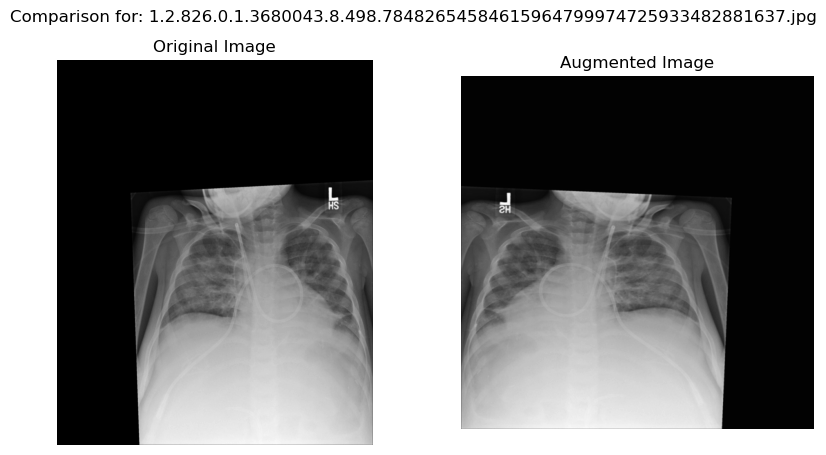

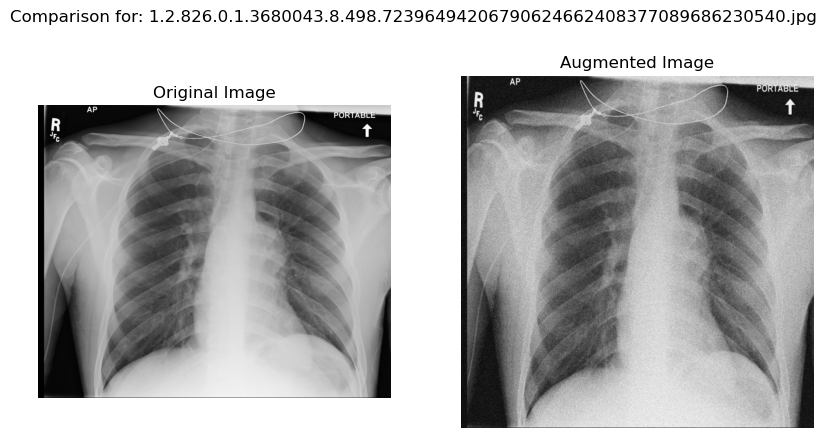

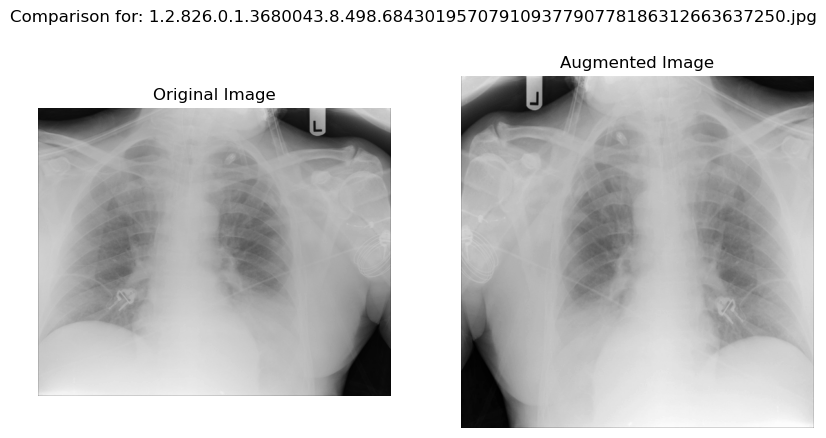

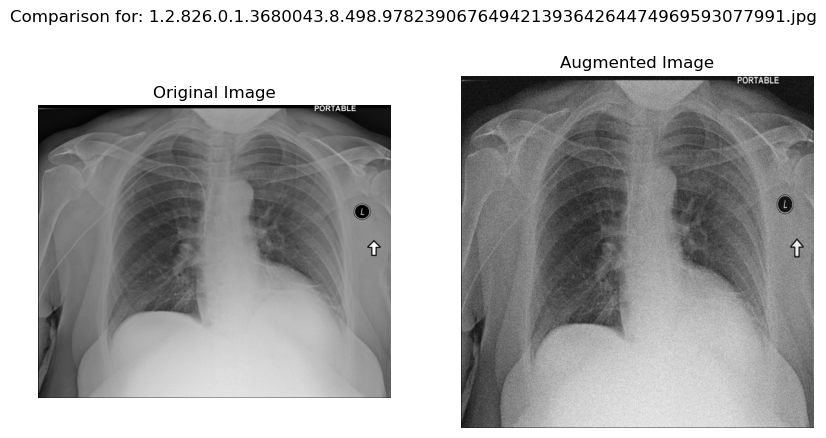

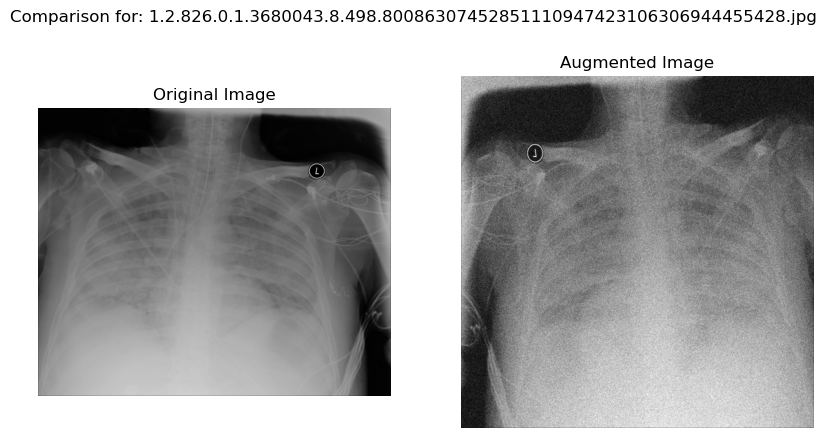

In [18]:
# Example usage
original_dir = r"C:/Users/liang/OneDrive/Desktop/S4/ADS2002/group/Simon/ranzcr_catheter_classification/train" # Original images directory
augmented_dir = r"E:/512preprocessed_v1"  # Augmented images directory
compare_original_and_augmented(original_dir, augmented_dir, num_samples=20)

Now we need to create a Unet Model, but we dont have to start from nothing, we can use segmentation_models (A Keras/TensorFlow open source library that provides implementations of U-Net and other classic segmentation networks and supports a variety of pre-trained backbone networks)

Use the U-Net implementation of the third-party library segmentation_models and configure a backbone network based on ResNet34

使用第三方库 segmentation_models 的 U-Net 实现，并配置了基于 ResNet34 的骨干网络

In [8]:
import tensorflow as tf
print(tf.__version__)


2.6.0


In [9]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [28]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout, Add, Multiply, GlobalAveragePooling2D, Reshape, Dense, Activation, Conv2DTranspose, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalMaxPooling2D, Concatenate

In [30]:
# Set directories for data
input_dir = r"E:/512preprocessed_v1"  # Preprocessed input images directory
annotation_file = r"C:/Users/liang/OneDrive/Desktop/S4/ADS2002/group/Simon/ranzcr_catheter_classification/train_annotations_updated.csv"  
# CSV file with updated annotations

# Load the annotations CSV file
annotations = pd.read_csv(annotation_file)

# List all input files
input_files = [f for f in os.listdir(input_dir) if f.lower().endswith('.npy')]

# Load images and generate masks from annotations
images = []
masks = []

for f in input_files:
    # Load preprocessed image
    image_path = os.path.join(input_dir, f)
    image = np.load(image_path)
    images.append(image)

    # Generate mask from annotations
    study_id = os.path.splitext(f)[0]
    rows = annotations[annotations['StudyInstanceUID'] == study_id]
    mask = np.zeros((512, 512), dtype=np.uint8)
    
    for _, row in rows.iterrows():
        points = eval(row['data'])  # Convert string representation of list to actual list
        if len(points) > 1:
            # Draw polylines to connect all points
            cv2.polylines(mask, [np.array(points, np.int32)], isClosed=False, color=255, thickness=2)
        for point in points:
            x, y = point
            cv2.circle(mask, (x, y), radius=5, color=255, thickness=-1)  # Mark the points on the mask

    masks.append(mask)

# Normalize images and masks
images = np.array(images)
images = images.astype('float32')
masks = np.array(masks) / 255.0  # Assuming masks are binary images (0, 1)
masks = masks.astype('float32')

# Expand dimensions for model input
images = np.expand_dims(images, axis=-1)
masks = np.expand_dims(masks, axis=-1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

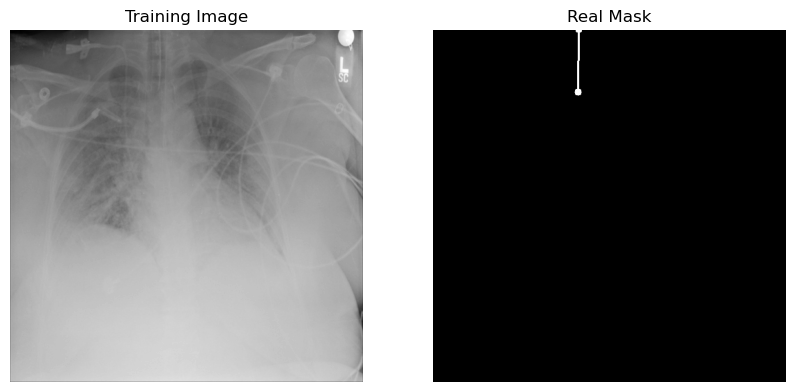

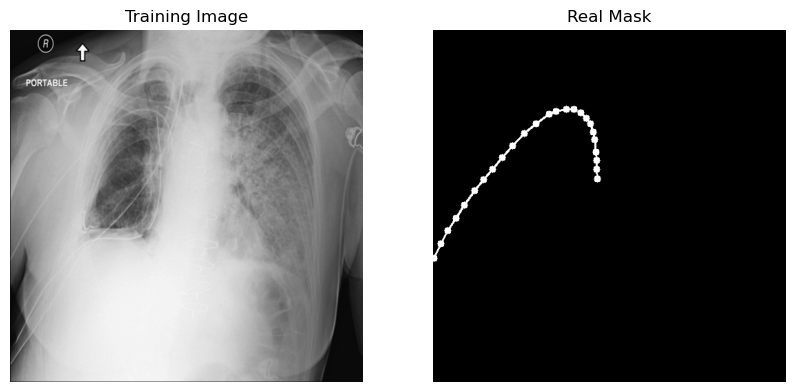

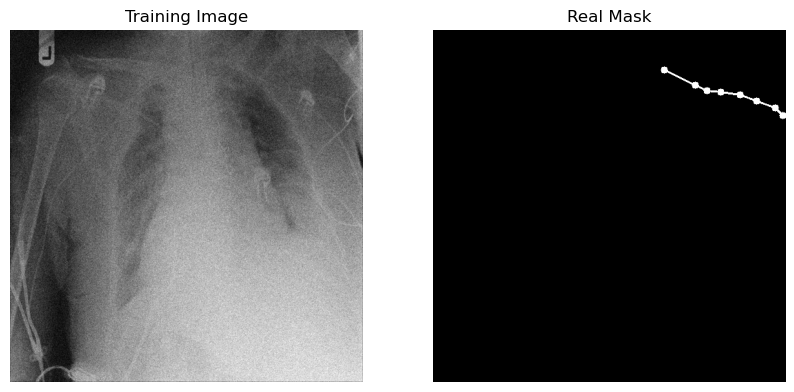

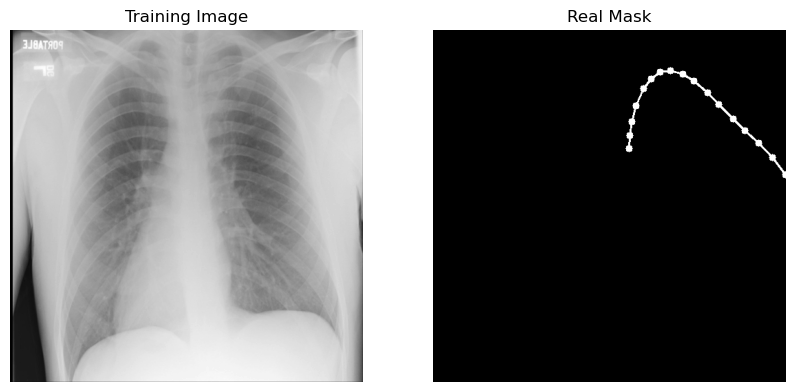

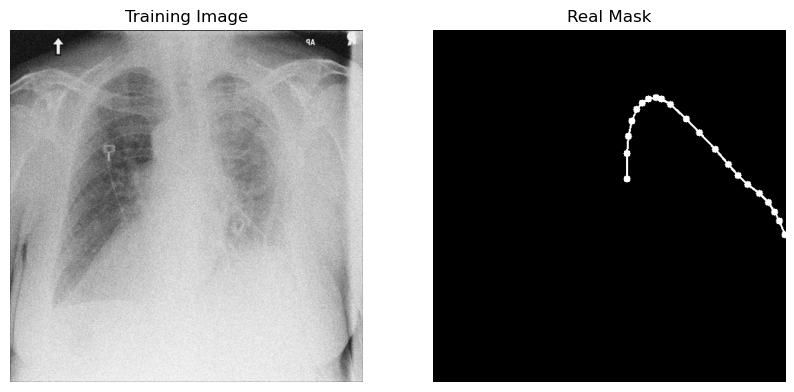

In [34]:
num_samples = 5
sample_indices = np.random.choice(len(X_train), num_samples, replace=False)

for i in sample_indices:
    plt.figure(figsize=(10, 5))
    
    # Display the training image
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title('Training Image')
    plt.axis('off')

    # Display the corresponding mask
    plt.subplot(1, 2, 2)
    plt.imshow(y_train[i].squeeze(), cmap='gray')
    plt.title('Real Mask')
    plt.axis('off')
    
    plt.show()

In [36]:
def build_unet_with_attention(input_shape):
    inputs = Input(input_shape)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)

    # Attention mechanism (Spatial Attention)
    avg_pool = GlobalAveragePooling2D()(c4)
    max_pool = GlobalMaxPooling2D()(c4)
    concat = Concatenate()([avg_pool, max_pool])
    attention = Dense(512, activation='sigmoid')(concat)
    attention = Reshape((1, 1, 512))(attention)
    c4 = Multiply()([c4, attention])

    # Decoder
    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c3])
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c2])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c1])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Build U-Net model with attention mechanism
input_shape = (512, 512, 1)
model = build_unet_with_attention(input_shape)


In [38]:
def dice_loss(y_true, y_pred):
    smooth = 1.0
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

model.compile(optimizer=Adam(learning_rate=1e-4), loss=lambda y_true, y_pred: 0.5 * tf.keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * dice_loss(y_true, y_pred), metrics=['accuracy'])

# Use early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=5,              # Wait for 5 epochs after no improvement
    restore_best_weights=True # Restore best weights based on validation loss
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=4,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping], # Use early stopping callback
    verbose=1
)

Epoch 1/15


C:\Users\liang\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_62']. Received: the structure of inputs=*
  warnings.warn(


572/572 ━━━━━━━━━━━━━━━━━━━━ 23698s 41s/step - accuracy: 0.9929 - loss: 0.5484 - val_accuracy: 0.9932 - val_loss: 0.5138
Epoch 2/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 23662s 41s/step - accuracy: 0.9929 - loss: 0.5126 - val_accuracy: 0.9863 - val_loss: 0.5082
Epoch 3/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 23270s 41s/step - accuracy: 0.9886 - loss: 0.5056 - val_accuracy: 0.9899 - val_loss: 0.4934
Epoch 4/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 23462s 41s/step - accuracy: 0.9879 - loss: 0.4920 - val_accuracy: 0.9902 - val_loss: 0.4767
Epoch 5/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 23219s 41s/step - accuracy: 0.9876 - loss: 0.4770 - val_accuracy: 0.9841 - val_loss: 0.4673
Epoch 6/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 23750s 42s/step - accuracy: 0.9887 - loss: 0.4596 - val_accuracy: 0.9891 - val_loss: 0.4544
Epoch 7/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 23502s 41s/step - accuracy: 0.9891 - loss: 0.4506 - val_accuracy: 0.9889 - val_loss: 0.4416
Epoch 8/15
572/572 ━━━━━━━━━━━━━━━━━━━━ 23477s 41s/step - accuracy: 0.9897 - loss: 0.43

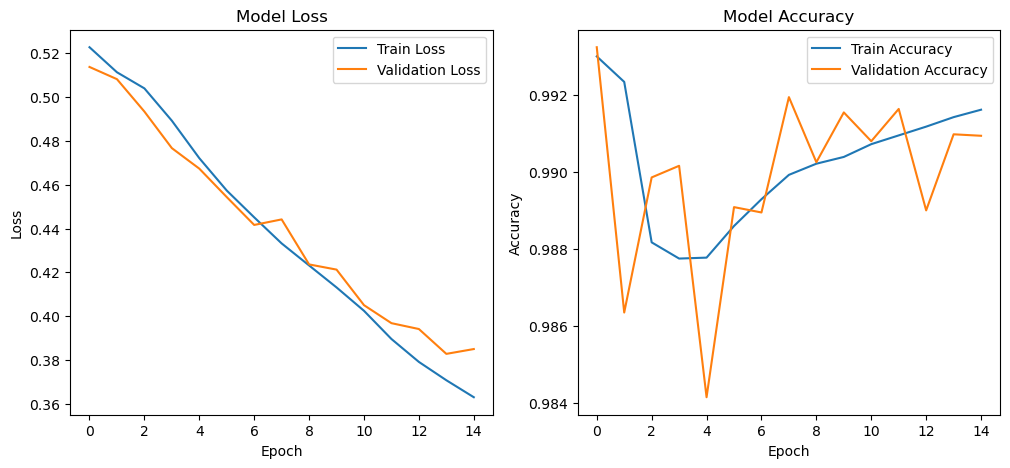

In [40]:
# Plot training history to evaluate accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


plot_training_history(history)

C:\Users\liang\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_62']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 384s 384s/step


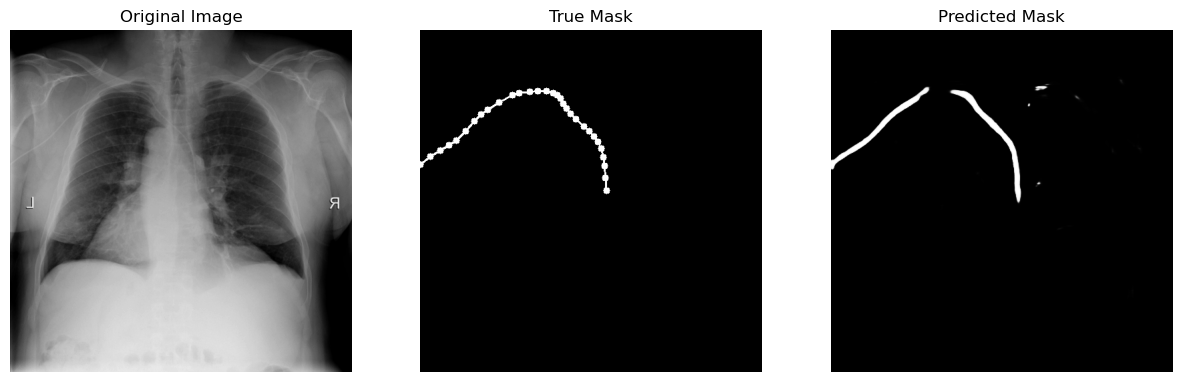

1/1 ━━━━━━━━━━━━━━━━━━━━ 398s 398s/step


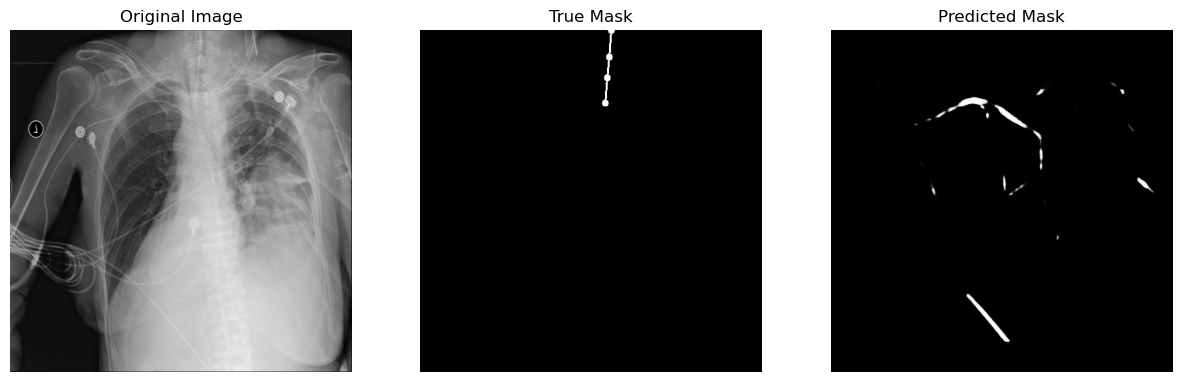

1/1 ━━━━━━━━━━━━━━━━━━━━ 374s 374s/step


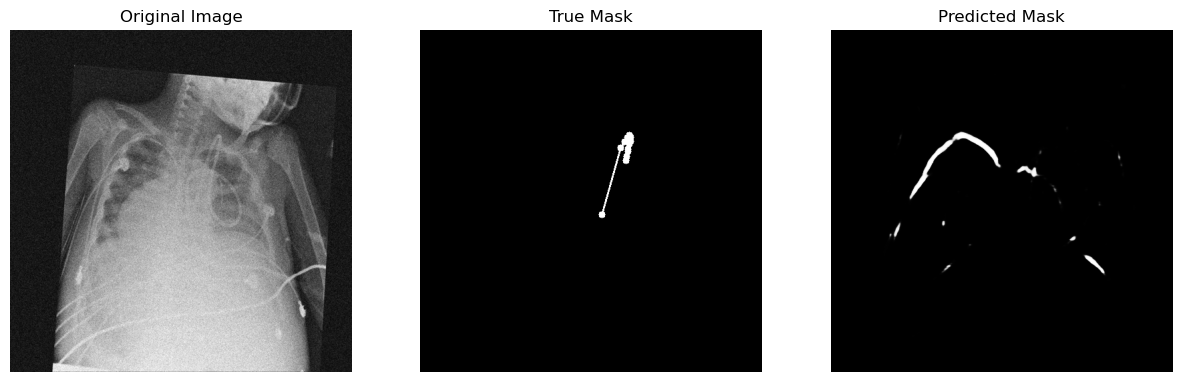

1/1 ━━━━━━━━━━━━━━━━━━━━ 368s 368s/step


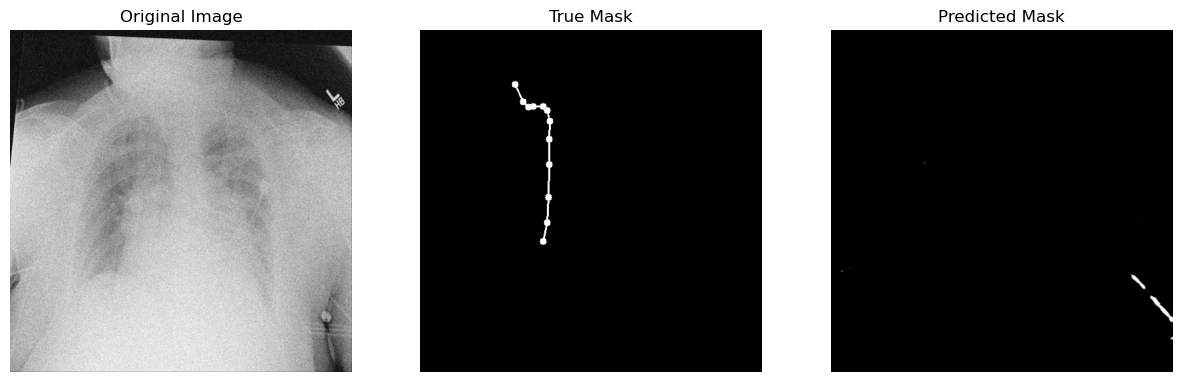

1/1 ━━━━━━━━━━━━━━━━━━━━ 375s 375s/step


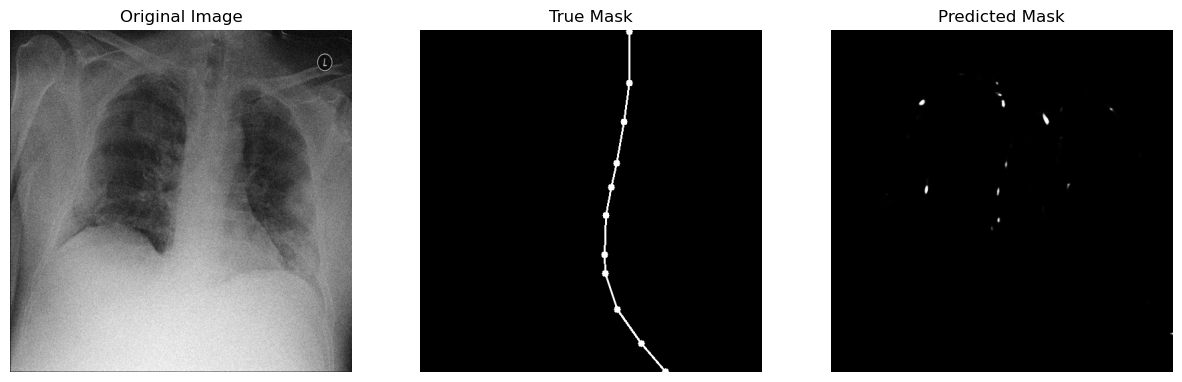

1/1 ━━━━━━━━━━━━━━━━━━━━ 382s 382s/step


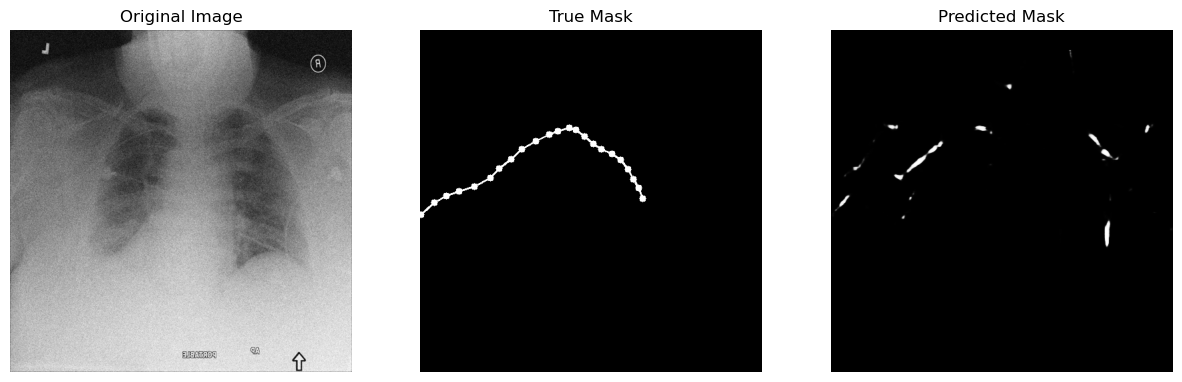

1/1 ━━━━━━━━━━━━━━━━━━━━ 406s 406s/step


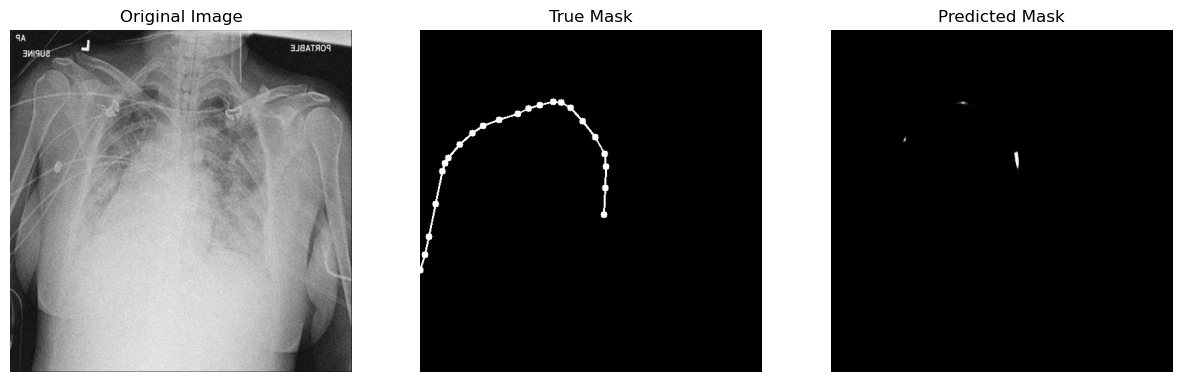

In [42]:
# Predict masks for a few validation images and visualize them
#验证集的对比，mask为灰度图像
num_samples = 7
sample_idx = np.random.choice(len(X_val), num_samples, replace=False)
for idx in sample_idx:
    original_image = X_val[idx]
    true_mask = y_val[idx]
    predicted_mask = model.predict(np.expand_dims(original_image, axis=0))[0]

    # Plot original image, true mask, and predicted mask
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image.squeeze(), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(true_mask.squeeze(), cmap='gray')
    plt.title('True Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask.squeeze(), cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()

In [ ]:
# 导入必要的库
import os
import numpy as np
import matplotlib.pyplot as plt

# 遍历整个数据集，包括训练集和验证集
all_images = np.concatenate((X_train, X_val), axis=0)
all_masks = np.concatenate((y_train, y_val), axis=0)

combined_images = []  # 用于存储堆叠后的图像

# 遍历所有图像并进行预测
for idx in range(len(all_images)):
    original_image = all_images[idx]  # 原始图像
    predicted_mask = model.predict(np.expand_dims(original_image, axis=0))[0]  # 预测掩膜

    # 将预测掩膜转换为 1 通道以便与原始图像叠加
    predicted_mask_1ch = np.stack([predicted_mask.squeeze()] * 1, axis=-1)

    # 将原始图像和预测掩膜堆叠在一起
    combined_image = np.concatenate([original_image, predicted_mask_1ch], axis=-1)
    combined_images.append(combined_image)

combined_images = np.array(combined_images)

# 随机打印 n 张原图和合成后的图像
n = 5  # 设置随机打印的数量
sample_indices = np.random.choice(len(all_images), n, replace=False)

for idx in sample_indices:
    plt.figure(figsize=(10, 5))

    # 打印原始图像
    plt.subplot(1, 2, 1)
    plt.imshow(all_images[idx].squeeze(), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # 打印合成后的图像
    plt.subplot(1, 2, 2)
    plt.imshow(combined_images[idx].squeeze(), cmap='gray')
    plt.title('Combined Image')
    plt.axis('off')

    plt.show()



In [ ]:
# 创建用于保存合成图像的文件夹
output_dir = "E:/512_combined_images_output_v1"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 将所有合成的图像保存到新的文件夹中
for idx, combined_image in enumerate(combined_images):
    save_path = os.path.join(output_dir, f"combined_image_{idx}.npy")
    np.save(save_path, combined_image)